# 单变量线性回归


<h1>目录<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#使用Tensorflow进行算法设计与训练的核心步骤" data-toc-modified-id="使用Tensorflow进行算法设计与训练的核心步骤-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>使用Tensorflow进行算法设计与训练的核心步骤</a></span></li><li><span><a href="#Tensorflow实现单变量线性回归" data-toc-modified-id="Tensorflow实现单变量线性回归-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tensorflow实现单变量线性回归</a></span><ul class="toc-item"><li><span><a href="#生成数据" data-toc-modified-id="生成数据-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>生成数据</a></span></li><li><span><a href="#构建模型" data-toc-modified-id="构建模型-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>构建模型</a></span></li><li><span><a href="#训练模型" data-toc-modified-id="训练模型-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>训练模型</a></span></li><li><span><a href="#进行预测" data-toc-modified-id="进行预测-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>进行预测</a></span></li></ul></li><li><span><a href="#小结" data-toc-modified-id="小结-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>小结</a></span></li></ul></div>

# 使用Tensorflow进行算法设计与训练的核心步骤

- ** （1）准备数据 **
- ** （2）构建模型 **
- ** （3）训练模型 **
- ** （4）测试评估 **

上述步骤是我们使用Tensorflow进行算法设计与训练的核心步骤，贯穿于后面介绍的具体实战中。<br> 本章用一个简单的例子来讲解这几个步骤。

# Tensorflow实现单变量线性回归

假设我们要学习的函数为线性函数$ y=2x+1 $

## 准备数据

In [182]:

%matplotlib inline
import matplotlib .pyplot as plt
import numpy as np
import tensorflow as tf
np.random.seed(5)

** 首先，生成输入数据。 ** <br> 我们需要构造满足这个函数的$x$和$y$同时加入一些不满足方程的噪声.

In [183]:


x_data = np.linspace(-1, 1, 100)
y_data = 2*x_data+1.0
y_data+=np.random.randn(*x_data.shape)*0.5 #随机生成x_data维度的数组/2,给y_data加上。

** 利用matplotlib画图 **

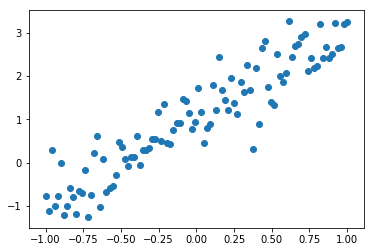

In [184]:


plt.figure()
plt.scatter(x_data,y_data)

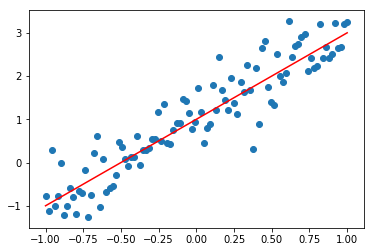

In [185]:
plt.scatter(x_data, y_data) 
# 画出我们想要学习到的线性函数 y = 2x +1
plt.plot (x_data, 1.0 + 2 * x_data, color='red') 



## 构建模型

** 定义$x$和$y$的占位符 **

In [186]:

x = tf.placeholder("float", name = "x")
y = tf.placeholder("float", name = "y")

** 构建回归模型 **

In [187]:


def model(x, w, b):
    return tf.multiply(x, w) + b

** 创建变量 **
<br>
- Tensorflow变量的声明函数是tf.Variable
- tf.Variable的作用是保存和更新参数
- 变量的初始值可以是随机数、常数，或是通过其他变量的初始值计算得到

In [188]:
w = tf.Variable(-1.0, name="w0")
b = tf.Variable(0.0, name="b0")

In [189]:

pred = model(x, w, b)

## 训练模型

** 设置训练参数 **

In [190]:


train_epochs = 30
learning_rate = 0.05

** 关于学习率（learning_rate）的设置 **<br>
- 学习率的作用：控制参数更新的幅度。
- 如果学习率设置过大，可能导致参数在极值附近来回摇摆，无法保证收敛。
- 如果学习率设置过小，虽然能保证收敛，但优化速度会大大降低，我们需要更多迭代次数才能达到较理想的优化效果。

** 定义损失函数 **
<br>
- 损失函数用于描述预测值与真实值之间的误差，从而指导模型收敛方向
- 常见损失函数：均方差（Mean Square Error, MSE）和交叉熵（cross-entropy）

In [191]:
loss_function = tf.pow(y-pred, 2) # 本例中采用均方差作为损失函数

** 选择优化器 **

In [192]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)# 梯度下降


** 声明会话 **

In [193]:
sess = tf.Session()

** 变量初始化 **
- 在真正执行计算之前，需将所有变量初始化
- 通过** tf.global_variables_initializer **函数可实现对所有变量的初始化

In [194]:

init = tf.global_variables_initializer()

** 执行训练 **

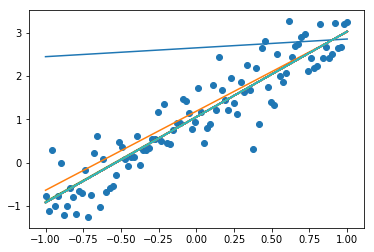

In [195]:
sess.run(init)
plt.scatter(x_data, y_data) 
for epoch in range(train_epochs):
    for xs,ys in zip(x_data, y_data):
        _, loss=sess.run([optimizer,loss_function], feed_dict={x: xs, y: ys})      
    b0temp=b.eval(session=sess)
    w0temp=w.eval(session=sess)
    plt.plot (x_data, b0temp + w0temp * x_data )# 画图


从上图可以看出，由于本案例所拟合的模型较简单，训练3次之后已经接近收敛。<br> 对于复杂模型，需要更多次训练才能收敛。

** 打印结果 **

In [196]:
print  ("w：", sess.run(w)) # w的值应该在2附近 
print ("b：", sess.run(b)) # b的值应该在1附近 

w： 1.9778701
b： 1.0525162


** 可视化 **

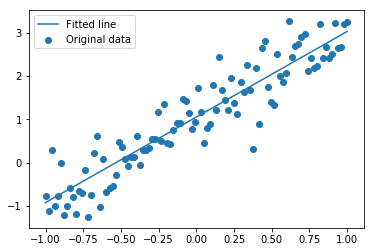

In [197]:


plt.scatter(x_data,y_data,label="Original data")
plt.plot(x_data,x_data*sess.run(w)+sess.run(b),label='Fitted line')
plt.legend(loc=2)

## 进行预测

In [198]:
x_test = 12.0
output = sess.run(w)  * x_test + sess.run(b)
print("预测值：%f" % output)
target = 2 * x_test + 1.0
print("目标值：%f" % target)

sess.close()

预测值：24.786958
目标值：25.000000


** 以上是利用Tensorflow训练一个线性模型并进行预测的完整过程。<br> 通过逐渐降低损失值loss来训练参数$w$和$b$拟合 $y = 2x + 1$中的系数2和1。 ** 

# 小结

** 通过一个简单的例子介绍了利用Tensorflow实现机器学习的思路，重点讲解了下述步骤： ** <br>
** - （1）生成人工数据集及其可视化 ** <br>
** - （2）构建线性模型 **<br>
** - （3）定义损失函数 **<br>
** - （4）最小化损失函数 **<br>
** - （5）训练结果的可视化 **<br>
** - （6）利用学习到的模型进行预测 **

